In [1]:
from car_schema import *
from wrangling import *
import seaborn as sns

24/01/07 19:54:40 WARN Utils: Your hostname, chema-BOHK-WAX9X resolves to a loopback address: 127.0.1.1; using 192.168.1.189 instead (on interface wlp2s0)
24/01/07 19:54:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/07 19:54:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/01/07 19:54:42 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
#coger un sample
pd_df=df_price.sample(0.3, 4).toPandas()

df_price.printSchema()


root
 |-- Maker: string (nullable = true)
 |-- Genmodel: string (nullable = true)
 |-- Genmodel_ID: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Entry_Price: integer (nullable = true)



[Row(skewness(Entry_Price)=3.998993504083825)]


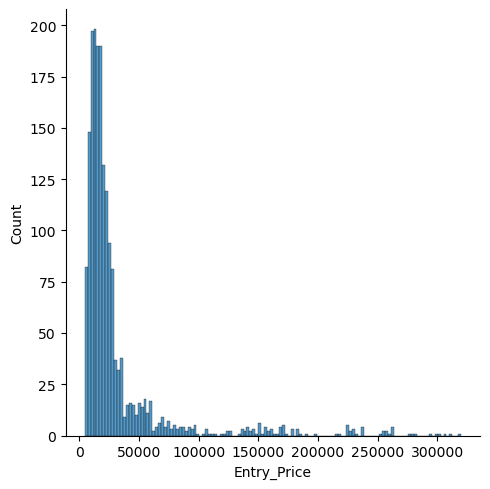

In [3]:
print(df_price.agg({'Entry_Price':'skewness'}).collect())
sns.displot(pd_df, x='Entry_Price')

There are outliers derived from very expensive cars, and the distribution is heavily skewed

24/01/07 19:54:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Maker, Genmodel, Genmodel_ID, Adv_ID, Adv_year, Adv_month, Color, Reg_year, Bodytype, Runned_Miles, Engin_size, Gearbox, Fuel_type, Price, Seat_num, Door_num
 Schema: Adv_Maker, Adv_Genmodel, Adv_Genmodel_ID, Adv_ID, Adv_year, Adv_month, Color, Reg_year, Bodytype, Runned_Miles, Engin_size, Gearbox, Fuel_type, Price, Seat_num, Door_num
Expected: Adv_Maker but found: Maker
CSV file: file:///home/chema/Documentos/GitHub/Spark/car_tables/Ad_table.csv


<AxesSubplot:>

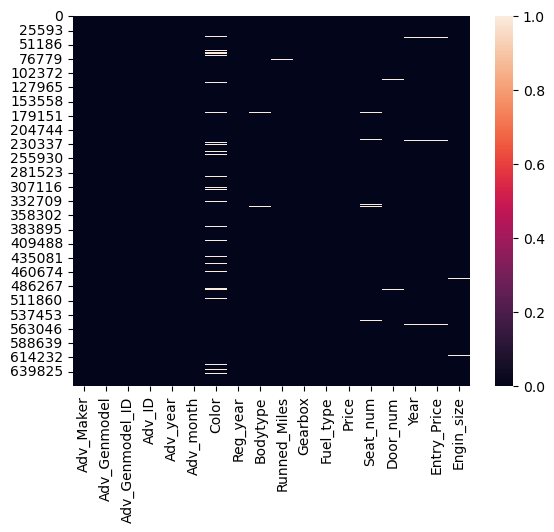

In [4]:
pd_df_ads= df_ads.sample(0.2, 4).toPandas()
sns.heatmap(pd_df_ads.isnull())

There are nulls in several columns, we could drop if there are features important for analysis or ml features.

In [6]:
pd_df_ads_dev=df_ads_dev.select(['Price', 'Engin_size', 'Runned_miles', 'Seat_num','Door_num', 'Deval_year']).sample(0.2).toPandas()
sns.heatmap(pd_df_ads_dev.corr())

24/01/07 19:56:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Maker, Genmodel, Genmodel_ID, Adv_year, Reg_year, Runned_Miles, Engin_size, Price, Seat_num, Door_num
 Schema: Adv_Maker, Adv_Genmodel, Adv_Genmodel_ID, Adv_year, Reg_year, Runned_Miles, Engin_size, Price, Seat_num, Door_num
Expected: Adv_Maker but found: Maker
CSV file: file:///home/chema/Documentos/GitHub/Spark/car_tables/Ad_table.csv


ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, '['Deval_year', 'Engin_size']' was supplied

Searching for correlations with the feature devaluation per year that we create with the join with entry_price